In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm 
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel
from statsmodels.stats.power import ttest_power
import os

In [2]:
import os
os.getcwd()

'C:\\Users\\honey\\Documents\\Data Science\\Great Learning\\Python Scripts'

# Wholesale+Customers+Data

In [3]:
Data1 = pd.read_csv('Wholesale+Customers+Data.csv')

In [4]:
Data1.head(5)

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [5]:
Data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [6]:
Data1.shape

(440, 9)

In [7]:
Data1.isnull().sum()

Buyer/Spender       0
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

In [8]:
Data1.describe(include="all")

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440,440,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
unique,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Hotel,Other,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,298,316,NaN,NaN,NaN,NaN,NaN,NaN
mean,220.500000,NaN,NaN,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,NaN,NaN,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,NaN,NaN,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,NaN,NaN,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,NaN,NaN,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,NaN,NaN,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000


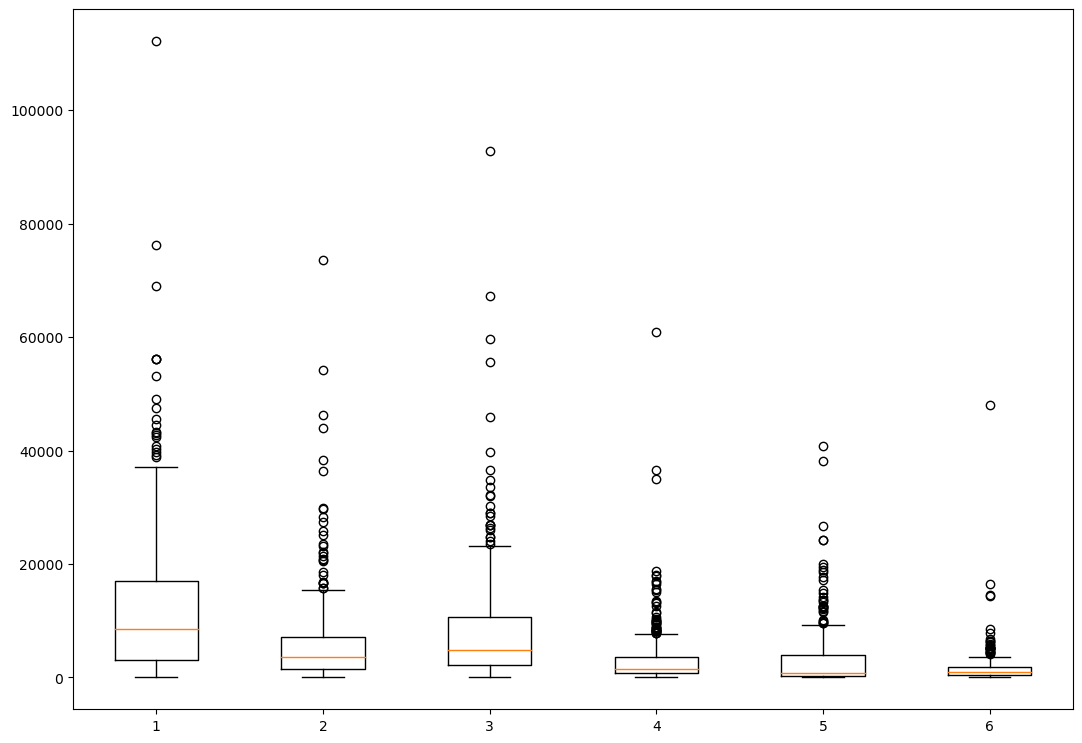

In [9]:
data_1 =  Data1.Fresh
data_2 =  Data1.Milk
data_3 =  Data1.Grocery
data_4 =  Data1.Frozen
data_5 =  Data1.Detergents_Paper
data_6 =  Data1.Delicatessen
data = [data_1, data_2, data_3, data_4, data_5, data_6]
 
fig = plt.figure(figsize =(10, 7))
 
ax = fig.add_axes([0, 0, 1, 1])
 
bp = ax.boxplot(data)
 
plt.show()

In [10]:
columns = ['Fresh', 'Milk', 'Grocery','Frozen', 'Detergents_Paper', 'Delicatessen']
columns

['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']

In [11]:
Region= Data1.groupby('Region')[columns].sum()
Region

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Region,,,,,,
Lisbon,854833,422454,570037,231026,204136,104327
Oporto,464721,239144,433274,190132,173311,54506
Other,3960577,1888759,2495251,930492,890410,512110


In [12]:
df1 = Region.sum(axis=1)
print(df1)

Region
Lisbon     2386813
Oporto     1555088
Other     10677599
dtype: int64


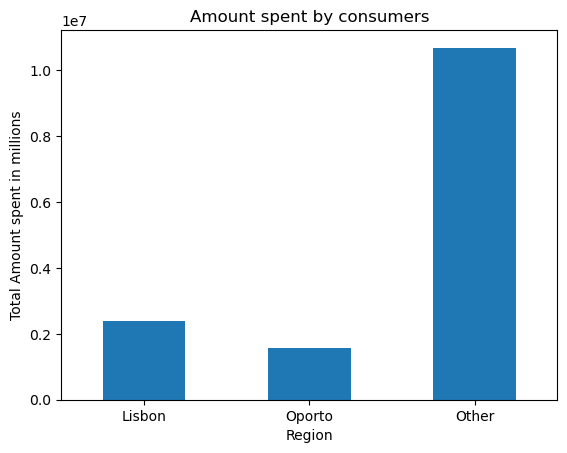

In [13]:
df1.plot(kind='bar')
plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Amount spent by consumers")
plt.xlabel("Region")
plt.ylabel("Total Amount spent in millions");

In [14]:
df2= Data1.groupby('Channel')[columns].sum()
df2

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Channel,,,,,,
Hotel,4015717,1028614,1180717,1116979,235587,421955
Retail,1264414,1521743,2317845,234671,1032270,248988


In [15]:
df3= df2.sum(axis=1)
print(df3)

Channel
Hotel     7999569
Retail    6619931
dtype: int64


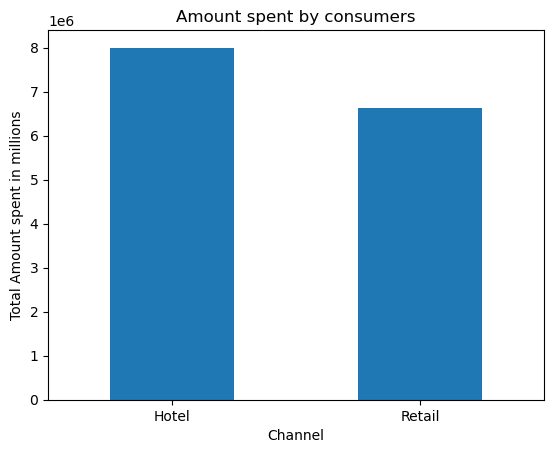

In [16]:
df3.plot(kind='bar')
plt.xticks(rotation=0, horizontalalignment="center")
plt.title("Amount spent by consumers")
plt.xlabel("Channel")
plt.ylabel("Total Amount spent in millions");

In [17]:
Dataset= Data1.describe()

In [18]:
Dataset.loc[('CV'), :] = Dataset.loc[('std'), :]/Dataset.loc[('mean'), :]
Dataset

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,220.500000,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,440.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000
CV,0.576695,1.053918,1.273299,1.195174,1.580332,1.654647,1.849407


# Survey-1 Dataset

In [19]:
Data2 = pd.read_csv('Survey-1.csv')

In [20]:
Data2.shape

(62, 14)

In [21]:
Data2.head(5)

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [22]:
Data2.describe(include= "all")

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
count,62.000000,62,62.000000,62,62,62,62.000000,62,62.000000,62.000000,62.000000,62.000000,62,62.000000
unique,NaN,2,NaN,3,8,3,NaN,3,NaN,NaN,NaN,NaN,3,NaN
top,NaN,Female,NaN,Senior,Retailing/Marketing,Yes,NaN,Part-Time,NaN,NaN,NaN,NaN,Laptop,NaN
freq,NaN,33,NaN,31,14,28,NaN,43,NaN,NaN,NaN,NaN,55,NaN
mean,31.500000,NaN,21.129032,NaN,NaN,NaN,3.129032,NaN,48.548387,1.516129,3.741935,482.016129,NaN,246.209677
std,18.041619,NaN,1.431311,NaN,NaN,NaN,0.377388,NaN,12.080912,0.844305,1.213793,221.953805,NaN,214.465950
min,1.000000,NaN,18.000000,NaN,NaN,NaN,2.300000,NaN,25.000000,0.000000,1.000000,100.000000,NaN,0.000000
25%,16.250000,NaN,20.000000,NaN,NaN,NaN,2.900000,NaN,40.000000,1.000000,3.000000,312.500000,NaN,100.000000
50%,31.500000,NaN,21.000000,NaN,NaN,NaN,3.150000,NaN,50.000000,1.000000,4.000000,500.000000,NaN,200.000000
75%,46.750000,NaN,22.000000,NaN,NaN,NaN,3.400000,NaN,55.000000,2.000000,4.000000,600.000000,NaN,300.000000


In [23]:
Data2.mode().head(5)

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,21.0,Senior,Retailing/Marketing,Yes,3.0,Part-Time,40.0,1.0,4.0,500.0,Laptop,300.0
1,2,NaN,NaN,NaN,NaN,NaN,3.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,3.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
Data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


In [25]:
Data2['Gender'].value_counts()

Gender
Female    33
Male      29
Name: count, dtype: int64

In [26]:
pd.crosstab(Data2['Gender'],Data2['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [27]:
pd.crosstab(Data2['Gender'],Data2['Class'])

Class,Junior,Senior,Sophomore
Gender,,,
Female,14,17,2
Male,11,14,4


In [28]:
pd.crosstab(Data2['Gender'],Data2['GPA']).sum()

GPA
2.3    1
2.4    1
2.5    6
2.6    2
2.8    3
2.9    4
3.0    7
3.1    7
3.2    6
3.3    5
3.4    7
3.5    6
3.6    3
3.7    2
3.8    1
3.9    1
dtype: int64

In [29]:
pd.crosstab(Data2['Gender'],Data2['Grad Intention'])

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [30]:
pd.crosstab(Data2['Gender'],Data2['Employment'])

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [31]:
pd.crosstab(Data2['Gender'],Data2['Computer'])

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


In [32]:
print('probability that a randomly selected CMSU student will be Male:',29/len(Data2['Gender']))

probability that a randomly selected CMSU student will be Male: 0.46774193548387094


In [33]:
print('probability that a randomly selected CMSU student will be Female:',33/len(Data2['Gender']))

probability that a randomly selected CMSU student will be Female: 0.532258064516129


 Find the conditional probability of different majors among the male students in CMSU.

In [34]:
pd.crosstab(Data2['Gender'],Data2['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


P (majors | male) = P (majors ∩ male)/ P(male)

In [35]:
print('Among Male students:')
print('Probability of students in Accounting:',4/29)
print('Probability of students in  CIS:',1/29)
print('Probability of students in Economics/Finance:',4/29)
print('Probability of students in International Business:',2/29)
print('Probability of students in Management:',6/29)
print('Probability of students in Other', 5/29)
print('Probability of students in Retailing/Marketing',5/29)
print('Probability of students who have Undecided Major',3/29)

Among Male students:
Probability of students in Accounting: 0.13793103448275862
Probability of students in  CIS: 0.034482758620689655
Probability of students in Economics/Finance: 0.13793103448275862
Probability of students in International Business: 0.06896551724137931
Probability of students in Management: 0.20689655172413793
Probability of students in Other 0.1724137931034483
Probability of students in Retailing/Marketing 0.1724137931034483
Probability of students who have Undecided Major 0.10344827586206896


Find the conditional probability of different majors among the female students of CMSU.

P (majors | female) = P (majors ∩ female)/ P(female)

In [36]:
print('Among Female students:')
print('Probability of students in Accounting:',3/33)
print('Probability of students in  CIS:',3/33)
print('Probability of students in Economics/Finance:',7/33)
print('Probability of students in International Business:',4/33)
print('Probability of students in Management:',4/33)
print('Probability of students in Other', 3/33)
print('Probability of students in Retailing/Marketing',9/33)
print('Probability of students who have Undecided Major',0/33)

Among Female students:
Probability of students in Accounting: 0.09090909090909091
Probability of students in  CIS: 0.09090909090909091
Probability of students in Economics/Finance: 0.21212121212121213
Probability of students in International Business: 0.12121212121212122
Probability of students in Management: 0.12121212121212122
Probability of students in Other 0.09090909090909091
Probability of students in Retailing/Marketing 0.2727272727272727
Probability of students who have Undecided Major 0.0


In [37]:
pd.crosstab(Data2['Gender'],Data2['Grad Intention'])

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


Find the probability That a randomly chosen student is a male and intends to graduate.

In [38]:
print("P(Grad Intention ∩ Male) = P (Grad Intention| Male) x P (male) = ",(17/29) * (29/62))

P(Grad Intention ∩ Male) = P (Grad Intention| Male) x P (male) =  0.27419354838709675


Find the probability that a randomly selected student is a female and does NOT have a laptop.

In [39]:
pd.crosstab(Data2['Gender'],Data2['Computer'])

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


In [40]:
print("P( Not Laptop ∩ Female) = P (Not Laptop | Female) x P (Female) = ",(4/33) * (33/62))

P( Not Laptop ∩ Female) = P (Not Laptop | Female) x P (Female) =  0.06451612903225806


Find the probability that a randomly chosen student is a male or has a full-time employment

In [41]:
pd.crosstab(Data2['Gender'],Data2['Employment'])

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [42]:
print("P( full-time employment OR Male)= P( full-time employment ∪ Male) = ",10/7)

P( full-time employment OR Male)= P( full-time employment ∪ Male) =  1.4285714285714286


In [43]:
pd.crosstab(Data2['Gender'],Data2['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


 Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [44]:
print("P(Female| International Business or Management)= P(F | IB ∪ M) = ", 8/16 )

P(Female| International Business or Management)= P(F | IB ∪ M) =  0.5


In [45]:
Data2.drop(Data2.index[Data2['Grad Intention'] == 'Undecided'], inplace = True)
Data2.head(5)

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
8,9,Female,20,Junior,Management,Yes,3.6,Unemployed,30.0,0,4,500,Laptop,400


In [46]:
pd.crosstab(Data2['Gender'],Data2['Grad Intention'])

Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


In [47]:
Data2['Gender'].value_counts()

Gender
Female    20
Male      20
Name: count, dtype: int64

In [48]:
Data2_GPA = Data2[Data2.GPA < 3.0]
Data2_GPA.head(5)

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
10,11,Female,23,Senior,Economics/Finance,Yes,2.8,Full-Time,50.0,2,5,400,Laptop,200
23,24,Male,22,Senior,Undecided,Yes,2.6,Full-Time,45.0,1,5,400,Laptop,600


In [49]:
pd.crosstab(Data2_GPA['Gender'],Data2_GPA['GPA'])

GPA,2.4,2.5,2.6,2.8,2.9
Gender,,,,,
Female,1,2,0,1,3
Male,0,3,2,1,1


In [50]:
Data2_Salary= Data2[Data2.Salary >= 50 ]
Data2_Salary.head(5)

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
10,11,Female,23,Senior,Economics/Finance,Yes,2.8,Full-Time,50.0,2,5,400,Laptop,200
14,15,Male,21,Senior,Management,Yes,3.2,Part-Time,54.0,3,4,600,Laptop,400
18,19,Male,19,Junior,Economics/Finance,Yes,3.5,Part-Time,52.0,2,5,500,Laptop,300
24,25,Female,20,Junior,Economics/Finance,Yes,3.0,Part-Time,55.0,1,3,600,Laptop,300


In [51]:
pd.crosstab(Data2_Salary['Gender'],Data2_Salary['Salary'])

Salary,50.0,52.0,54.0,55.0,60.0,65.0,70.0
Gender,,,,,,,
Female,4,0,0,2,3,0,1
Male,4,1,1,1,2,1,0


In [52]:
Data2.head(10)

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
8,9,Female,20,Junior,Management,Yes,3.6,Unemployed,30.0,0,4,500,Laptop,400
10,11,Female,23,Senior,Economics/Finance,Yes,2.8,Full-Time,50.0,2,5,400,Laptop,200
11,12,Male,21,Senior,Undecided,No,3.5,Full-Time,37.0,2,3,500,Laptop,100
14,15,Male,21,Senior,Management,Yes,3.2,Part-Time,54.0,3,4,600,Laptop,400
18,19,Male,19,Junior,Economics/Finance,Yes,3.5,Part-Time,52.0,2,5,500,Laptop,300
23,24,Male,22,Senior,Undecided,Yes,2.6,Full-Time,45.0,1,5,400,Laptop,600


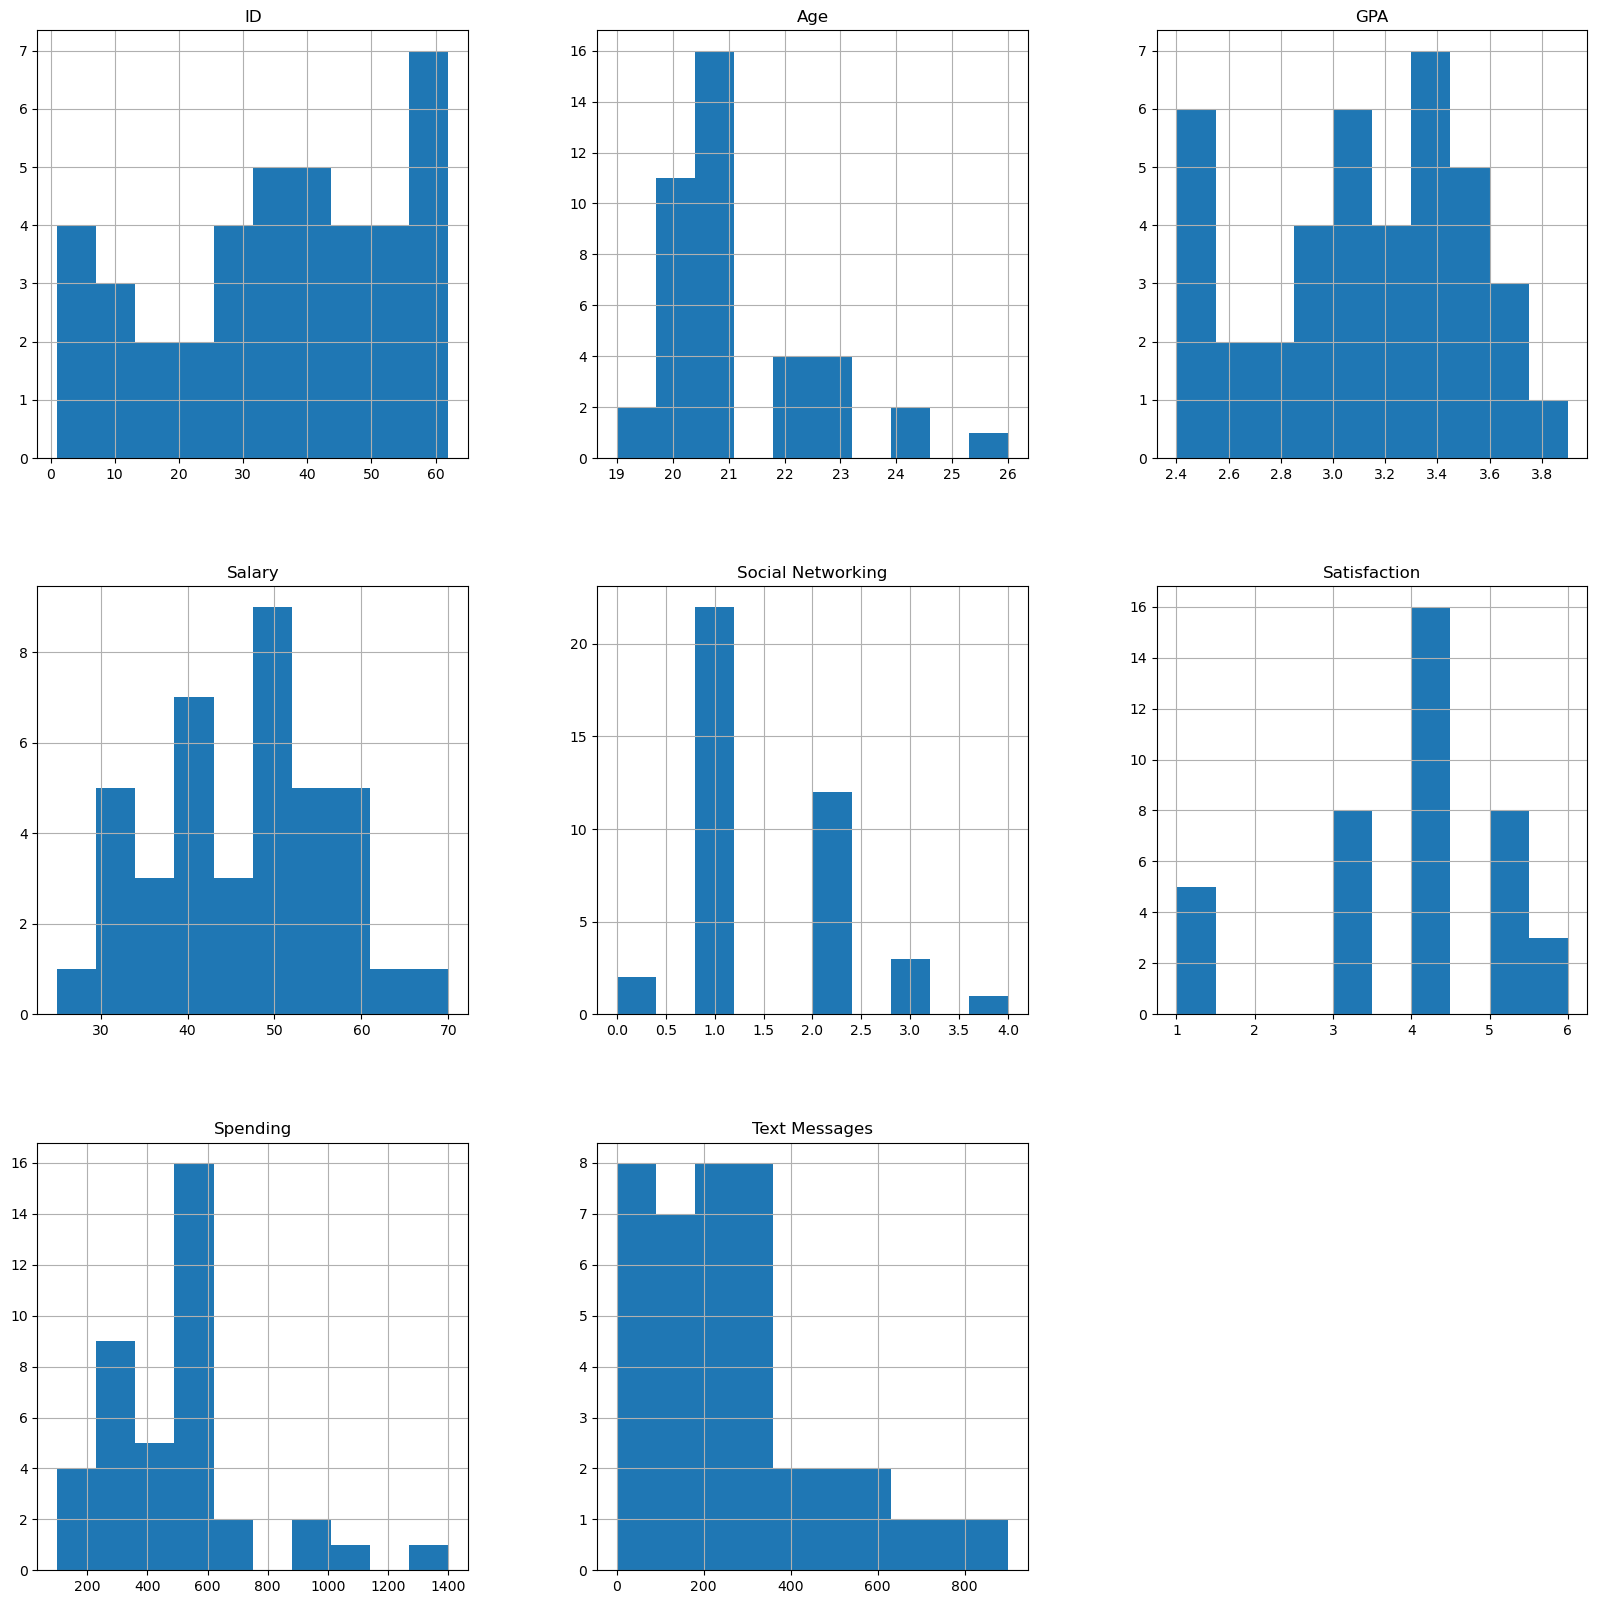

In [53]:
Data2.hist(figsize=(20,20));

In [54]:
Data2.describe(include= "all")

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
count,40.000000,40,40.000000,40,40,40,40.000000,40,40.000000,40.000000,40.000000,40.000000,40,40.00000
unique,NaN,2,NaN,3,8,2,NaN,3,NaN,NaN,NaN,NaN,3,NaN
top,NaN,Female,NaN,Senior,Retailing/Marketing,Yes,NaN,Part-Time,NaN,NaN,NaN,NaN,Laptop,NaN
freq,NaN,20,NaN,19,8,28,NaN,27,NaN,NaN,NaN,NaN,35,NaN
mean,35.425000,NaN,21.200000,NaN,NaN,NaN,3.100000,NaN,46.362500,1.475000,3.775000,496.875000,NaN,264.62500
std,18.363687,NaN,1.435806,NaN,NaN,NaN,0.386304,NaN,10.935702,0.816104,1.349026,254.862174,NaN,219.85831
min,1.000000,NaN,19.000000,NaN,NaN,NaN,2.400000,NaN,25.000000,0.000000,1.000000,100.000000,NaN,0.00000
25%,24.750000,NaN,20.000000,NaN,NaN,NaN,2.875000,NaN,40.000000,1.000000,3.000000,337.500000,NaN,100.00000
50%,37.500000,NaN,21.000000,NaN,NaN,NaN,3.150000,NaN,48.750000,1.000000,4.000000,500.000000,NaN,200.00000
75%,51.250000,NaN,22.000000,NaN,NaN,NaN,3.400000,NaN,54.250000,2.000000,5.000000,600.000000,NaN,312.50000


In [55]:
#Checking empirical rule to check Normal distribution for GPA
mean1 = 3.100000
SD1 = 3.150000
one_sd = norm.cdf(SD1, mean1, SD1) - norm.cdf(-SD1, mean1, SD1)
two_sd = norm.cdf(2 * SD1, mean1, SD1) - norm.cdf(-2 * SD1, mean1, SD1)
three_sd = norm.cdf(3 * SD1, mean1, SD1) - norm.cdf(-3 * SD1, mean1, SD1)

In [56]:
print("Fraction of values within one SD =", one_sd)
print("Fraction of values within two SD =", two_sd)
print("Fraction of values within three SD =", three_sd)

Fraction of values within one SD = 0.4827113084199802
Fraction of values within two SD = 0.8437331263151738
Fraction of values within three SD = 0.9780595077023675


In [57]:
#Checking empirical rule to check Normal distribution for Salary
mean2 = 46.36
SD2 = 10.93
first_sd = norm.cdf(SD2, mean2, SD2) - norm.cdf(-SD2, mean2, SD2)
second_sd = norm.cdf(2 * SD2, mean2, SD2) - norm.cdf(-2 * SD1, mean2, SD2)
third_sd = norm.cdf(3 * SD2, mean2, SD2) - norm.cdf(-3 * SD2, mean2, SD2)

In [58]:
print("Fraction of values within first_sd =", first_sd)
print("Fraction of values within second_sd =", second_sd)
print("Fraction of values within third_sd =", third_sd)

Fraction of values within first_sd = 0.0005943552656031757
Fraction of values within second_sd = 0.01249492879984014
Fraction of values within third_sd = 0.10720370932127128


In [59]:
#Checking empirical rule to check Normal distribution for Spending
mean3 = 496.875
SD3 = 254.86
first_sd3 = norm.cdf(SD3, mean3, SD3) - norm.cdf(-SD3, mean3, SD3)
second_sd3 = norm.cdf(2 * SD3, mean3, SD3) - norm.cdf(-2 * SD3, mean3, SD3)
third_sd3 = norm.cdf(3 * SD3, mean3, SD3) - norm.cdf(-3 * SD3, mean3, SD3)

In [60]:
print("Fraction of values within first_sd3 =", first_sd3)
print("Fraction of values within second_sd3 =", second_sd3)
print("Fraction of values within third_sd3 =", third_sd3)

Fraction of values within first_sd3 = 0.16956689603538241
Fraction of values within second_sd3 = 0.5200591283670073
Fraction of values within third_sd3 = 0.8532325558297389


In [61]:
#Checking empirical rule to check Normal distribution for Text Messages
mean4 = 264.625
SD4 = 219.85
first_sd4 = norm.cdf(SD4, mean4, SD4) - norm.cdf(-SD4, mean4, SD4)
second_sd4 = norm.cdf(2 * SD4, mean4, SD4) - norm.cdf(-2 * SD4, mean4, SD4)
third_sd4 = norm.cdf(3 * SD4, mean4, SD4) - norm.cdf(-3 * SD4, mean4, SD4)

In [62]:
print("Fraction of values within first_sd4 =", first_sd4)
print("Fraction of values within second_sd4 =", second_sd4)
print("Fraction of values within third_sd4 =", third_sd4)

Fraction of values within first_sd4 = 0.4055349046376787
Fraction of values within second_sd4 = 0.7864038583844697
Fraction of values within third_sd4 = 0.9637665123038764


# A & B shingles

In [63]:
from scipy.stats import f
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind
from statsmodels.stats.power import ttest_power

In [64]:
Data3 = pd.read_csv('A+%26+B+shingles-1.csv')

In [65]:
Data3.head(5)

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [66]:
Data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       36 non-null     float64
 1   B       31 non-null     float64
dtypes: float64(2)
memory usage: 708.0 bytes


In [67]:
Data3.describe()

,A,B
count,36.000000,31.000000
mean,0.316667,0.273548
std,0.135731,0.137296
min,0.130000,0.100000
25%,0.207500,0.160000
50%,0.290000,0.230000
75%,0.392500,0.400000
max,0.720000,0.580000


In [68]:
Data3_A= Data3.loc[0:36,['A']]
Data3_A

,A
0,0.44
1,0.61
2,0.47
3,0.30
4,0.15
5,0.24
6,0.16
7,0.20
8,0.20
9,0.20


Here we select α = 0.05

In [69]:
Data3_A.describe()

,A
count,36.000000
mean,0.316667
std,0.135731
min,0.130000
25%,0.207500
50%,0.290000
75%,0.392500
max,0.720000


In [70]:
print("The sample size for this problem is",len(Data3_A))

The sample size for this problem is 36


In [71]:
#one sample t-test
# null hypothesis: expected value <= 0.35 
t_statistic, p_value = ttest_1samp(Data3_A,0.35 )
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, p_value))

One sample t test 
t statistic: [-1.47350463] p value: [0.14955266] 


In [72]:
# p_value < 0.05 => alternative hypothesis:

alpha_value = 0.05 # Level of significance
print('Level of significance: %.2f' %alpha_value)
if p_value < alpha_value: 
    print('We have evidence to reject the null hypothesis since p value < Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since p value > Level of significance') 

print ("Our one-sample t-test p-value=", p_value)

Level of significance: 0.05
We have no evidence to reject the null hypothesis since p value > Level of significance
Our one-sample t-test p-value= [0.14955266]


In [73]:
Data3_B= Data3.loc[0:30,['B']]
Data3_B

,B
0,0.14
1,0.15
2,0.31
3,0.16
4,0.37
5,0.18
6,0.42
7,0.58
8,0.25
9,0.41


In [74]:
#one sample t-test
# null hypothesis: expected value <= 0.35 
t_statistic, p_value = ttest_1samp(Data3_B,0.35 )
print('One sample t test \nt statistic:{0} p value:{1} '.format(t_statistic, p_value))

One sample t test 
t statistic:[-3.10033131] p value:[0.00418095] 


In [75]:
# p_value < 0.05 => alternative hypothesis:

alpha_value = 0.05 # Level of significance
print('Level of significance: %.2f' %alpha_value)
if p_value < alpha_value: 
    print('We have evidence to reject the null hypothesis since p value < Level of significance')
else:
    print('We have no evidence to reject the null hypothesis since p value > Level of significance') 

print ("Our one-sample t-test p-value=", p_value)

Level of significance: 0.05
We have evidence to reject the null hypothesis since p value < Level of significance
Our one-sample t-test p-value= [0.00418095]


3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

In [76]:
# 2 sample t test for independent samples
t_statistic, p_value  = ttest_ind(Data3['A'],Data3['B'],nan_policy = 'omit')
print('tstat',t_statistic)    
print('P Value',p_value)   

tstat 1.289628271966112
P Value 0.2017496571835328


In [77]:
# p_value < 0.05 => alternative hypothesis:
# they don't have the same mean at the 5% significance level
print ("two-sample t-test p-value=", p_value)

alpha_level = 0.05

if p_value < alpha_level:
    print('We have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    print('We conclude that the mean of Shingles A and Shingles B is not equal.')
else:
    print('We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    print('We conclude that the mean of Shingles A and Shingles B is equal.')

two-sample t-test p-value= 0.2017496571835328
We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis
We conclude that the mean of Shingles A and Shingles B is equal.
